---
# Carregar Dataset
---

In [407]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
import statistics
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, KFold, train_test_split,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
#from tensorflow.keras.models  import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

RANDOM_SEED = 2022

In [408]:
df = pd.read_csv("training_data.csv")
df_test = pd.read_csv("test_data.csv")

---
# Exploração de dados
---

- **city_name** - nome da cidade em causa;
- **record_date** - o timestamp associado ao registo;
- **magnitude_of_delay** - magnitude do atraso provocado pelos incidentes que se verificam no record_date correspondente;
- **delay_in_seconds** - atraso, em segundos, provocado pelos incidentes que se verificam no record_date correspondente;
- **affected_roads** - estradas afectadas pelos incidentes que se verificam no record_date correspondente;
- **luminosity** - o nível de luminosidade que se verificava na cidade de Guimarães;
- **avg_temperature** - valor médio da temperatura para o record_date na cidade de Guimarães;
- **avg_atm_pressure** - valor médio da pressão atmosférica para o record_date na cidade de Guimarães;
- **avg_humidity** - valor médio de humidade para o record_date na cidade de Guimarães;
- **avg_wind_speed** - valor médio da velocidade do vento para o record_date na cidade de Guimarães;
- **avg_precipitation** - valor médio de precipitação para o record_date na cidade de Guimarães;
- **avg_rain** - avaliação qualitativa do nível de precipitação para o record_date na cidade de Guimarães;
- **incidents** - indicação acerca do nível de incidentes rodoviários que se verificam no record_date correspondente na cidade de Guimarães.

In [409]:
df.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [411]:
df.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [412]:
print("------------\n" + "Value counts (incidents):\n\n" + df['incidents'].value_counts().to_string() + "\n------------\n")

for s in ['city_name','magnitude_of_delay','luminosity','avg_rain']:
    print("------------\n" + "Value counts (" + s + "):\n\n" + "training dataset:\n" + df[s].value_counts().to_string() + 
          "\n\ntest dataset:\n" + df_test[s].value_counts().to_string() + "\n------------\n")

------------
Value counts (incidents):

None         2028
High         1073
Low           718
Very_High     603
Medium        578
------------

------------
Value counts (city_name):

training dataset:
Guimaraes    5000

test dataset:
Guimaraes    1206
------------

------------
Value counts (magnitude_of_delay):

training dataset:
UNDEFINED    4314
MAJOR         678
MODERATE        8

test dataset:
UNDEFINED    1030
MAJOR         175
MODERATE        1
------------

------------
Value counts (luminosity):

training dataset:
DARK         2489
LIGHT        2325
LOW_LIGHT     186

test dataset:
DARK         623
LIGHT        546
LOW_LIGHT     37
------------

------------
Value counts (avg_rain):

training dataset:
Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3

test dataset:
Sem Chuva         1140
chuva fraca         56
chuva moderada       8
chuva forte          2
------------



In [413]:
print("training dataset:" ,df['avg_precipitation'].value_counts())
print("\ntest dataset:" ,df['avg_precipitation'].value_counts())

training dataset: 0.0    5000
Name: avg_precipitation, dtype: int64

test dataset: 0.0    5000
Name: avg_precipitation, dtype: int64


In [414]:
#Values are always the same (irrelevant features)
df.drop(['city_name','avg_precipitation'], axis=1, inplace=True)
df_test.drop(['city_name','avg_precipitation'], axis=1, inplace=True)

In [415]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,560.567000,14.583000,1018.145000,74.455000,1.253500
std,1686.859581,4.820514,5.174372,17.204638,1.269847
min,0.000000,1.000000,997.000000,6.000000,0.000000
25%,0.000000,11.000000,1015.000000,63.000000,0.000000
50%,0.000000,14.000000,1019.000000,78.000000,1.000000
75%,234.000000,18.000000,1022.000000,90.000000,2.000000
max,31083.000000,35.000000,1032.000000,100.000000,10.000000


In [416]:
print(f"Skewness: \n{df.skew()}")
print(f"\nKurtosis: \n{df.kurt()}")

Skewness: 
delay_in_seconds    6.274561
avg_temperature     0.560506
avg_atm_pressure   -0.404397
avg_humidity       -0.762679
avg_wind_speed      1.361024
dtype: float64

Kurtosis: 
delay_in_seconds    63.136555
avg_temperature      0.532773
avg_atm_pressure     0.120680
avg_humidity        -0.249918
avg_wind_speed       2.516310
dtype: float64


/tmp/ipykernel_4093/932093429.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Skewness: \n{df.skew()}")
/tmp/ipykernel_4093/932093429.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"\nKurtosis: \n{df.kurt()}")


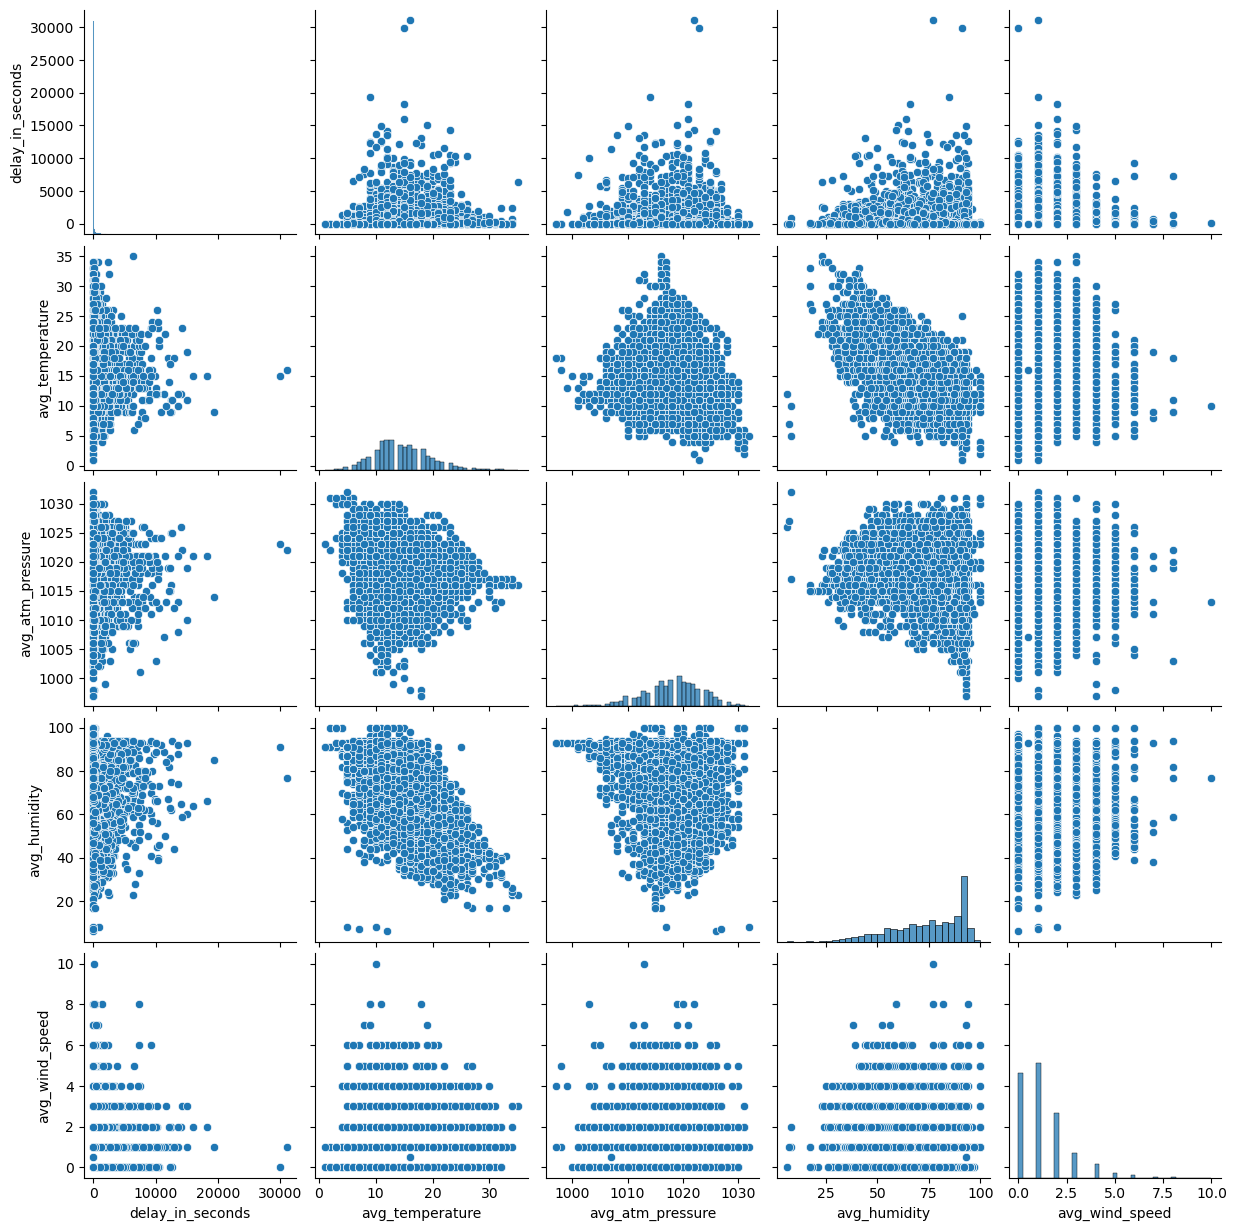

In [417]:
sns.pairplot(df)

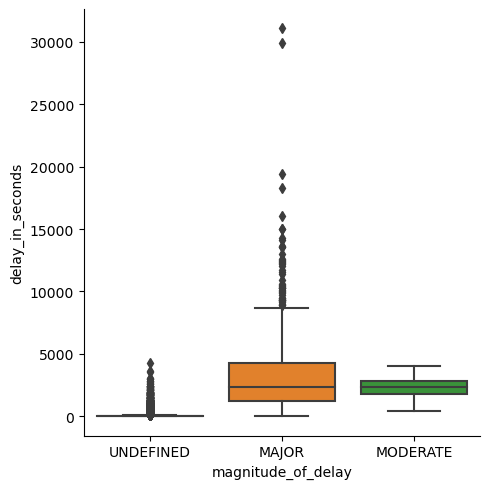

In [418]:
sns.catplot(y='delay_in_seconds', x='magnitude_of_delay', data=df, kind='box')

<AxesSubplot:xlabel='avg_wind_speed'>

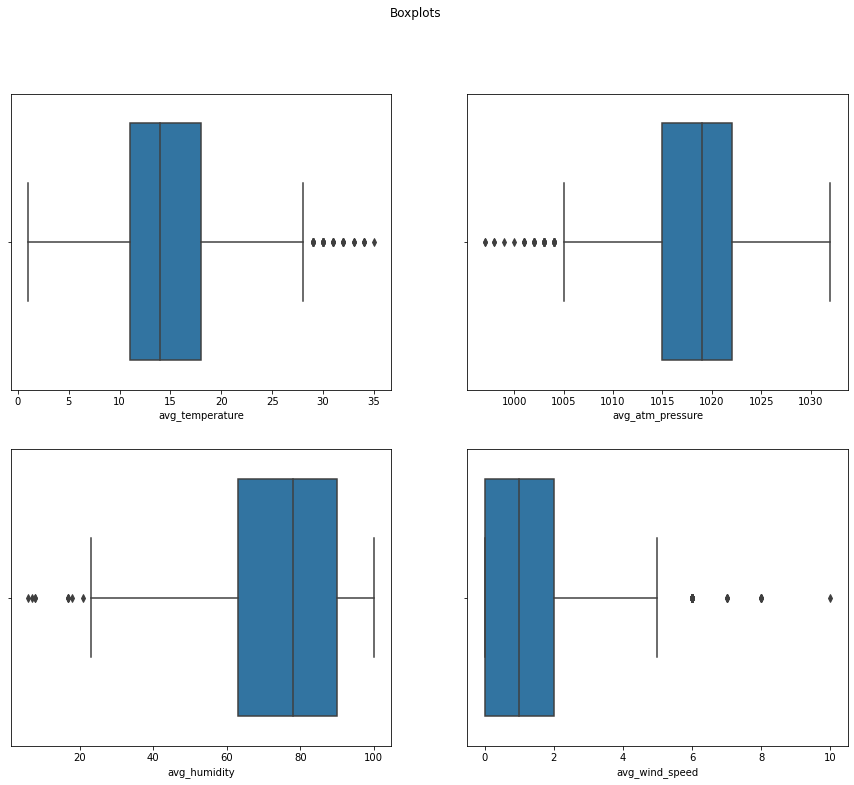

In [850]:
fig, axs = plt.subplots(2,2, figsize = (15,12))
fig.suptitle("Boxplots")
sns.boxplot(x=df['avg_temperature'], ax=axs[0,0])
sns.boxplot(x=df['avg_atm_pressure'], ax=axs[0,1])
sns.boxplot(x=df['avg_humidity'], ax=axs[1,0])
sns.boxplot(x=df['avg_wind_speed'], ax=axs[1,1])

/tmp/ipykernel_4093/1826249297.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot:>

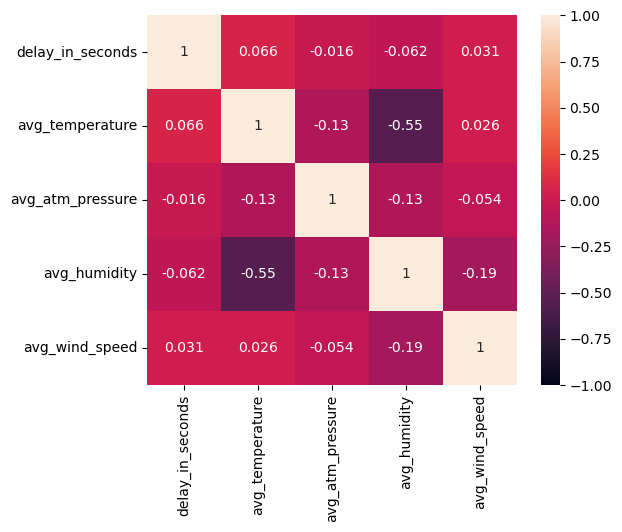

In [419]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
#Strong correlation between the features avg_temperature and avg_humidity

In [420]:
#Only the feature affected_roads has missing values
df.isna().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

----------
* Tratamento das roads

In [421]:
#Function to remove duplicate roads
import re
def updateRoadSet(val,setRoads):
    pattern = re.compile(",?(\w[ \w\-]*\w|\w),?")
    lista = re.findall(pattern,val)
    
    for road in lista:
        setRoads.add(road)

In [422]:
# Remover roads duplicadas
setRoads = set()
df['affected_roads'].fillna(",").apply(updateRoadSet,args=(setRoads,))
df_test['affected_roads'].fillna(",").apply(updateRoadSet,args=(setRoads,))

print(setRoads)

{'IC5', 'N309', 'N105', 'N206', 'N101 - N310', 'EM579', 'IC5 - N206', 'N310', 'R206', 'N207-4', 'N101'}


In [423]:
for road in setRoads:
    df[road] = 0
    df_test[road] = 0

In [424]:
import re
def get_roads(roads_string : str):
    pattern = re.compile(",?(\w[ \w\-]*\w|\w),?")
    l = re.findall(pattern,roads_string)
    roads = dict()
    for r in l:
        road_count = roads.get(r)
        if(road_count != None):
            roads[r] = road_count + 1
        else:
            roads[r] = 1
    return roads

In [425]:
#For train dataset
for i in range (0, df.shape[0]):
    row = df.iloc[i]
    roads_string = str(row['affected_roads'])
    roads = get_roads(roads_string)
    for road,counter in roads.items():
        if(road!="nan"):
           df.at[i, road] = counter
           #df.at[i, road] = 1

#For test dataset
for i in range (0, df_test.shape[0]):
    row = df_test.iloc[i]
    roads_string = str(row['affected_roads'])
    roads = get_roads(roads_string)
    for road,counter in roads.items():
        if(road!="nan"):
           df_test.at[i, road] = counter

In [426]:
df

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,IC5,N309,N105,N206,N101 - N310,EM579,IC5 - N206,N310,R206,N207-4,N101
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,0,0,0,0,0,0,0,0,0,0,1
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,0,1,0,0,0,0,0,1,0,9
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,0,0,0,0,0,0,0,0,0,5
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,0,0,0,0,0,0,0,0,0,5
4997,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,0,0,0,0,0,0,0,0,0,0
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,0,0,0,0,0,0,0,0,0,5


----------
* Tratamento dos duplicados

In [427]:
#No duplicated entries
df.duplicated().value_counts()

False    5000
dtype: int64

---
# Tratamento dos dados
---

In [428]:
#'affected roads' separar as entradas em várias por cada estrada
df.drop(['affected_roads'], axis=1, inplace=True)
df_test.drop(['affected_roads'], axis=1, inplace=True)

In [429]:
#'record_date' separar em diversos campos (horas(??),dia,mes,trimestre,semestre,ano)
#combinar dia da semana com epocas??
#from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
#cal = calendar()
#dr = pd.date_range(start='2021-01-01', end='2021-12-31')
#holidays = cal.holidays(start=dr.min(), end=dr.max())
#df['Holiday'] = df['Date'].isin(holidays)
from datetime import date
import holidays
pt_holidays = holidays.PT()
pt_holidays.get("2022-12-25 20:00")

def isHoliday(date):
    if(pt_holidays.get(date) == None):
        return 0
    else:
        return 1

df['is_holiday'] = df['record_date'].apply(isHoliday)
df_test['is_holiday'] = df_test['record_date'].apply(isHoliday)

In [430]:
df['record_date'] = pd.to_datetime(df['record_date'])
df_test['record_date'] = pd.to_datetime(df_test['record_date'])

df['hour'] = df['record_date'].dt.hour #TODO binning
df_test['hour'] = df_test['record_date'].dt.hour

df['day'] = df['record_date'].dt.day
df_test['day'] = df_test['record_date'].dt.day

df['day_of_week'] = df['record_date'].dt.dayofweek
df_test['day_of_week'] = df_test['record_date'].dt.dayofweek

#df['week'] = df['record_date'].dt.week

df['month'] = df['record_date'].dt.month
df_test['month'] = df_test['record_date'].dt.month

#df['year'] = df['record_date'].dt.year  # Removed because all occurrences happen in 2021.

df.drop(['record_date'], axis=1, inplace=True)
df_test.drop(['record_date'], axis=1, inplace=True)

In [431]:
"""
def binnDaHora(hora):
    if magnitude_of_delay == 'UNDEFINED': #horas mortas
        return 0;
    elif magnitude_of_delay == 'MODERATE':
        return 1;
    elif magnitude_of_delay == 'MAJOR':
        return 2;
    else:
        return -1;
    
df['magnitude_of_delay_cat'] = df['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder)
df_test['magnitude_of_delay_cat'] = df_test['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder) 
df.drop(['magnitude_of_delay'], axis=1, inplace=True)
df_test.drop(['magnitude_of_delay'], axis=1, inplace=True) 
"""

"\ndef binnDaHora(hora):\n    if magnitude_of_delay == 'UNDEFINED': #horas mortas\n        return 0;\n    elif magnitude_of_delay == 'MODERATE':\n        return 1;\n    elif magnitude_of_delay == 'MAJOR':\n        return 2;\n    else:\n        return -1;\n    \ndf['magnitude_of_delay_cat'] = df['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder)\ndf_test['magnitude_of_delay_cat'] = df_test['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder) \ndf.drop(['magnitude_of_delay'], axis=1, inplace=True)\ndf_test.drop(['magnitude_of_delay'], axis=1, inplace=True) \n"

In [432]:
def magnitude_of_delay_label_encoder(magnitude_of_delay):
    if magnitude_of_delay == 'UNDEFINED':
        return 0;
    elif magnitude_of_delay == 'MODERATE':
        return 1;
    elif magnitude_of_delay == 'MAJOR':
        return 2;
    else:
        return -1;
    
df['magnitude_of_delay_cat'] = df['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder)
df_test['magnitude_of_delay_cat'] = df_test['magnitude_of_delay'].apply(magnitude_of_delay_label_encoder) 
df.drop(['magnitude_of_delay'], axis=1, inplace=True)
df_test.drop(['magnitude_of_delay'], axis=1, inplace=True) 

In [433]:
def luminosity_label_encoder(luminosity):
    if luminosity == 'DARK':
        return 0;
    elif luminosity == 'LOW_LIGHT':
        return 1;
    elif luminosity == 'LIGHT':
        return 2;
    else:
        return -1;
    
df['luminosity_cat'] = df['luminosity'].apply(luminosity_label_encoder)
df_test['luminosity_cat'] = df_test['luminosity'].apply(luminosity_label_encoder) 
df.drop(['luminosity'], axis=1, inplace=True)
df_test.drop(['luminosity'], axis=1, inplace=True) 

In [434]:
def avg_rain_label_encoder(avg_rain):
    if avg_rain == 'Sem Chuva':
        return 0;
    elif avg_rain == 'chuva fraca':
        return 1;
    elif avg_rain == 'chuva moderada':
        return 2;
    elif avg_rain == 'chuva forte':
        return 3;
    else:
        return -1;
    
df['avg_rain_cat'] = df['avg_rain'].apply(avg_rain_label_encoder)
df_test['avg_rain_cat'] = df_test['avg_rain'].apply(avg_rain_label_encoder)
df.drop(['avg_rain'], axis=1, inplace=True)
df_test.drop(['avg_rain'], axis=1, inplace=True)  

In [435]:
def incidents_label_encoder(incidents):
    if incidents == 'None':
        return 0
    elif incidents == 'Low':
        return 1
    elif incidents == 'Medium':
        return 2
    elif incidents == 'High':
        return 3
    elif incidents == 'Very_High':
        return 4
    else:
        return -1
    
def incidents_label_decoder(incidents_cat):
    if incidents_cat == 0:
        return 'None'
    elif incidents_cat == 1:
        return 'Low'
    elif incidents_cat == 2:
        return 'Medium'
    elif incidents_cat == 3:
        return 'High'
    elif incidents_cat == 4:
        return 'Very_High'
    else:
        return ""
    
df['incidents_cat'] = df['incidents'].apply(incidents_label_encoder)

In [436]:
df.head()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,incidents,IC5,N309,N105,N206,N101 - N310,EM579,IC5 - N206,N310,R206,N207-4,N101,is_holiday,hour,day,day_of_week,month,magnitude_of_delay_cat,luminosity_cat,avg_rain_cat,incidents_cat
0,0,12.0,1013.0,70.0,1.0,None,0,0,0,0,0,0,0,0,0,0,0,0,23,15,0,3,0,0,0,0
1,385,12.0,1007.0,91.0,1.0,None,0,0,0,0,0,0,0,0,0,0,1,1,18,25,5,12,0,0,0,0
2,69,14.0,1025.0,64.0,0.0,Low,0,0,0,0,0,0,0,0,0,0,0,0,15,12,4,3,0,2,0,1
3,2297,15.0,1028.0,75.0,1.0,Very_High,0,0,1,0,0,0,0,0,1,0,9,0,9,29,2,9,2,2,0,4
4,0,27.0,1020.0,52.0,1.0,High,0,0,0,0,0,0,0,0,0,0,5,0,11,13,6,6,0,2,0,3


In [437]:
#for feature in ['magnitude_of_delay', 'luminosity', 'avg_rain', 'incidents']:
#    print(df[[feature, feature + '_cat']].drop_duplicates().sort_values(by=[feature + '_cat']).reset_index(drop=True),"\n")

In [438]:
#order columns
df.sort_index(axis=1)

,EM579,IC5,IC5 - N206,N101,N101 - N310,N105,N206,N207-4,N309,N310,R206,avg_atm_pressure,avg_humidity,avg_rain_cat,avg_temperature,avg_wind_speed,day,day_of_week,delay_in_seconds,hour,incidents,incidents_cat,is_holiday,luminosity_cat,magnitude_of_delay_cat,month
0,0,0,0,0,0,0,0,0,0,0,0,1013.0,70.0,0,12.0,1.0,15,0,0,23,None,0,0,0,0,3
1,0,0,0,1,0,0,0,0,0,0,0,1007.0,91.0,0,12.0,1.0,25,5,385,18,None,0,1,0,0,12
2,0,0,0,0,0,0,0,0,0,0,0,1025.0,64.0,0,14.0,0.0,12,4,69,15,Low,1,0,2,0,3
3,0,0,0,9,0,1,0,0,0,0,1,1028.0,75.0,0,15.0,1.0,29,2,2297,9,Very_High,4,0,2,2,9
4,0,0,0,5,0,0,0,0,0,0,0,1020.0,52.0,0,27.0,1.0,13,6,0,11,High,3,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,5,0,0,0,0,0,0,0,1021.0,56.0,0,13.0,0.0,13,1,0,0,High,3,0,0,0,4
4996,0,0,0,5,0,0,0,0,0,0,0,1017.0,68.0,0,19.0,0.0,6,1,0,14,None,0,0,2,0,7
4997,0,0,0,0,0,0,0,0,0,0,0,1023.0,47.0,0,13.0,2.0,18,3,0,3,None,0,0,0,0,3
4998,0,0,0,5,0,0,0,0,0,0,0,1014.0,93.0,0,12.0,2.0,2,1,0,6,None,0,0,0,0,11


---
# Modelos
---

In [439]:
x = df.drop(['incidents','incidents_cat','magnitude_of_delay_cat'],axis=1)
y = df['incidents_cat'].to_frame()

In [440]:
x

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,IC5,N309,N105,N206,N101 - N310,EM579,IC5 - N206,N310,R206,N207-4,N101,is_holiday,hour,day,day_of_week,month,luminosity_cat,avg_rain_cat
0,0,12.0,1013.0,70.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,23,15,0,3,0,0
1,385,12.0,1007.0,91.0,1.0,0,0,0,0,0,0,0,0,0,0,1,1,18,25,5,12,0,0
2,69,14.0,1025.0,64.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,12,4,3,2,0
3,2297,15.0,1028.0,75.0,1.0,0,0,1,0,0,0,0,0,1,0,9,0,9,29,2,9,2,0
4,0,27.0,1020.0,52.0,1.0,0,0,0,0,0,0,0,0,0,0,5,0,11,13,6,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,13.0,1021.0,56.0,0.0,0,0,0,0,0,0,0,0,0,0,5,0,0,13,1,4,0,0
4996,0,19.0,1017.0,68.0,0.0,0,0,0,0,0,0,0,0,0,0,5,0,14,6,1,7,2,0
4997,0,13.0,1023.0,47.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,3,3,0,0
4998,0,12.0,1014.0,93.0,2.0,0,0,0,0,0,0,0,0,0,0,5,0,6,2,1,11,0,0


In [441]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=2022, criterion='gini', max_depth=1000)
scores = cross_val_score(clf, x, y, cv=10)
print(scores)
print('RESULT: %0.2f accuracy with a standard deviation of %0.2f' % (scores.mean(), scores.std()))
print(scores.mean())

[0.914 0.924 0.914 0.918 0.924 0.93  0.918 0.888 0.912 0.924]
RESULT: 0.92 accuracy with a standard deviation of 0.01
0.9166000000000001


In [442]:
clf = RandomForestClassifier(random_state=RANDOM_SEED,max_depth=1500)

skf = StratifiedKFold(n_splits=100, random_state=RANDOM_SEED, shuffle=True)
skf.get_n_splits(x, y)

print(skf)
clf_accu_stratified = []
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(x_train, y_train.values.ravel())
    clf_accu_stratified.append(clf.score(x_test, y_test))
print('List of possible accuracy:', clf_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:',max(clf_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',    min(clf_accu_stratified)*100, '%')
print('\nOverall Accuracy:',    statistics.mean(clf_accu_stratified)*100, '%')
print('\nStandard Deviation is:', statistics.stdev(clf_accu_stratified))

StratifiedKFold(n_splits=100, random_state=2022, shuffle=True)
List of possible accuracy: [0.92, 0.9, 0.88, 0.92, 0.92, 0.98, 0.94, 0.94, 0.96, 0.92, 0.84, 0.9, 0.98, 0.9, 0.94, 0.96, 0.88, 0.9, 0.96, 0.92, 0.92, 0.92, 0.94, 0.9, 0.9, 0.86, 0.78, 0.96, 0.94, 0.94, 0.9, 0.9, 0.96, 0.88, 0.92, 0.92, 0.96, 0.9, 0.88, 0.84, 0.88, 0.92, 0.94, 0.92, 0.84, 0.92, 0.92, 0.88, 0.96, 0.94, 0.96, 0.86, 0.92, 0.96, 0.94, 0.96, 0.94, 0.82, 0.96, 0.9, 0.88, 0.88, 0.94, 0.9, 0.92, 0.92, 0.94, 0.86, 0.94, 0.94, 0.92, 0.9, 0.86, 0.84, 0.92, 0.92, 0.92, 0.92, 0.94, 0.98, 0.88, 0.96, 0.88, 0.96, 1.0, 0.92, 0.98, 0.88, 0.98, 0.86, 0.86, 0.96, 0.86, 0.92, 0.98, 0.88, 0.88, 0.94, 0.92, 0.9]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 78.0 %

Overall Accuracy: 91.56 %

Standard Deviation is: 0.040359996195853294


In [406]:
df_test

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,N101,R206,N105,N309,IC5,N206,EM579,N310,N101 - N310,N207-4,is_holiday,hour,day,day_of_week,month,magnitude_of_delay_cat,luminosity_cat,avg_rain_cat
0,1211,15.0,1018.0,80.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19,13,1,4,0,2,0
1,0,16.0,1018.0,41.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,13,2,10,0,0,0
2,0,22.0,1017.0,71.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19,18,6,7,0,2,0
3,140,18.0,1008.0,81.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15,30,5,10,0,2,0
4,0,20.0,1022.0,86.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,18,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0,12.0,1025.0,70.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,31,4,12,0,2,0
1202,44,24.0,1016.0,39.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,16,4,7,0,0,0
1203,1261,13.0,1018.0,60.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15,19,6,12,2,2,0
1204,246,15.0,1015.0,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,8,0,3,0,2,0


In [456]:
x_train_data = df.drop(['incidents','incidents_cat','magnitude_of_delay_cat'],axis=1)
#y_train_data = df['incidents_cat'].to_frame()
#clf.fit(x_train_data, y_train_data)
test_data = df_test.drop(['magnitude_of_delay_cat'], axis=1)
predictions = clf.predict(test_data)    
    
submissao = pd.DataFrame({"RowId" : range(1,1207), "Incidents": predictions}).set_index('RowId')
submissao['Incidents'] = submissao['Incidents'].apply(incidents_label_decoder)
submissao.to_csv("submissao.csv")

In [ ]:
clf = RandomForestClassifier(random_state=RANDOM_SEED, max_depth= 1000, max_features= 'auto')
params_CLF = {
 'criterion': ['gini','entropy']
 }
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

grid_search = GridSearchCV(estimator=clf,
                           param_grid= params_CLF,
                           cv = kf,
                           scoring="accuracy",
                           refit="True",
                           verbose = 1)
grid_search.fit(x_train,y_train.values.ravel())

In [693]:
"""
def build_model(activation="relu",learning_rate=0.01):
    #Create a sequential
    model = Sequential()
    model.add(Dense(16, input_dim=len(x_train_data.columns), activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation="relu"))

    #Compile the model
    #
    model.compile(
        loss="mae",
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ["mae","mse"])
    return model
"""

In [694]:
"""
model = build_model()
model.summary()
TUNING_DICT = {
    "activation": ["relu", "sigmoid"],
    "learning_rate": [0.02, 0.001]
}
"""

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 16)                368       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 9         
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [699]:
"""
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=5,batch_size=5)
grid_search = GridSearchCV(estimator=model,
                           param_grid= TUNING_DICT,
                           cv = kf,
                           scoring="neg_mean_absolute_error",
                           refit="True",
                           verbose = 1)

#grid_search.fit(x_train,y_train,validation_split=0.2)
"""

'\nkf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)\n\nmodel = KerasRegressor(build_fn=build_model, epochs=5,batch_size=5)\ngrid_search = GridSearchCV(estimator=model,\n                           param_grid= TUNING_DICT,\n                           cv = kf,\n                           scoring="neg_mean_absolute_error",\n                           refit="True",\n                           verbose = 1)\n\n#grid_search.fit(x_train,y_train,validation_split=0.2)\n'

In [ ]:
"""
print("Best : %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f  (%f) with: %r" % (mean, stdev, param))
"""